# Document Classification

To explore the objectives of this project refer to [Read Me.](README.md)

If you are running this project for the first time, first make sure you have all the libraries with:
```
pip install -r requirements.txt
```

Then run `main.py` to collect online resources with:
```
py main.py
```

This notebook deals with classification of blog posts. Links to resource files are done through Google Collabratory/Drive integration and should be adjusted to local paths if necessary.

In [324]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, TruncatedSVD

In [288]:
# Clean up tokens
import file_manager as fm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
links = fm.get("_all_links")
data_block = fm.get("_data_block")
str_list = []
tags = []
keys = np.array(list(data_block.keys()))
np.random.shuffle(keys)
for k in keys:
    full_string = " ".join([token for token in data_block[k]['tokens'] if len(token) >= 2])
    str_list.append(full_string)
    tags.append(data_block[k]['tag'])


In [321]:
def cross_validation_wrapper(data, labels, vector_type, test_split_ratio, model):
    X_train, X_test, y_train, y_test = data_formatter(data, labels, vector_type, test_split_ratio)
    results = cross_validation(model, X_train, y_train, 10)
    showResults(results)

In [317]:
def data_formatter(data, labels, vec_type, test_size = 0.1):
    if vec_type == 'bow':
        cv = CountVectorizer()
        X = cv.fit_transform(data)
    elif vec_type == 'tfidf':
        tfidf = TfidfVectorizer()
        X = tfidf.fit_transform(data)
        
    # svd = TruncatedSVD(n_components = 10, random_state = 123)
    # = svd.fit_transform(X)
    le = LabelEncoder()
    y = le.fit_transform(labels)
    return train_test_split(X, y, test_size = test_size)

In [290]:
len(str_list)

340

In [306]:
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [300]:
def showResults(results):
    for k in results.keys():
        print(k)
        try:
            for i in range(len(results[k])):
                print(f'{i}th Fold : ', results[k][i])
        except Exception as e:
            print(results[k])
    return

In [334]:
def trainModel(estimator, data, tags, vector_type, test_split_ratio):
    X_train, X_test, y_train, y_test = data_formatter(data, tags, vector_type, test_split_ratio)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
    print('Classification Report')
    print(classification_report(y_test,y_pred))
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
    plt.show()

## MULTINOMIAL NAIVE BAYES

### BOW

In [323]:
clf = MultinomialNB()
cross_validation_wrapper(str_list, tags, 'bow', 0.0, clf)

Training Accuracy scores
0th Fold :  0.9836065573770492
1th Fold :  0.9901639344262295
2th Fold :  0.9868852459016394
3th Fold :  0.9836065573770492
4th Fold :  0.9803921568627451
5th Fold :  0.9869281045751634
6th Fold :  0.9869706840390879
7th Fold :  0.990228013029316
8th Fold :  0.993485342019544
9th Fold :  0.9869706840390879
Mean Training Accuracy
98.69237279646912
Training Precision scores
0th Fold :  0.9927007299270073
1th Fold :  0.9928057553956835
2th Fold :  0.9857142857142858
3th Fold :  0.9856115107913669
4th Fold :  0.9855072463768116
5th Fold :  0.9857142857142858
6th Fold :  0.9858156028368794
7th Fold :  0.9859154929577465
8th Fold :  1.0
9th Fold :  0.9858156028368794
Mean Training Precision
0.9885600512550946
Training Recall scores
0th Fold :  0.9714285714285714
1th Fold :  0.9857142857142858
2th Fold :  0.9857142857142858
3th Fold :  0.9785714285714285
4th Fold :  0.9714285714285714
5th Fold :  0.9857142857142858
6th Fold :  0.9858156028368794
7th Fold :  0.99290780

Accuracy = 0.8823529411764706
Classification Report
             precision    recall  f1-score   support

          0       0.94      0.85      0.89        39
          1       0.82      0.93      0.87        29

avg / total       0.89      0.88      0.88        68



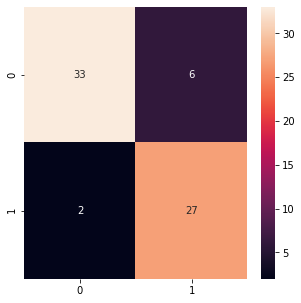

In [344]:
clf = MultinomialNB()
trainModel(clf, str_list, tags, 'bow', 0.2)

### TF-IDF

In [322]:
clf = MultinomialNB()
cross_validation_wrapper(str_list, tags, 'tfidf', 0.0, clf)

Training Accuracy scores
0th Fold :  0.9737704918032787
1th Fold :  0.9672131147540983
2th Fold :  0.9737704918032787
3th Fold :  0.980327868852459
4th Fold :  0.9705882352941176
5th Fold :  0.9673202614379085
6th Fold :  0.9804560260586319
7th Fold :  0.9804560260586319
8th Fold :  0.9771986970684039
9th Fold :  0.9739413680781759
Mean Training Accuracy
97.45042581208985
Training Precision scores
0th Fold :  0.9925373134328358
1th Fold :  0.9924242424242424
2th Fold :  1.0
3th Fold :  0.9926470588235294
4th Fold :  0.9924812030075187
5th Fold :  0.9924242424242424
6th Fold :  0.9927007299270073
7th Fold :  0.9927007299270073
8th Fold :  0.9926470588235294
9th Fold :  0.9925925925925926
Mean Training Precision
0.9933155171382506
Training Recall scores
0th Fold :  0.95
1th Fold :  0.9357142857142857
2th Fold :  0.9428571428571428
3th Fold :  0.9642857142857143
4th Fold :  0.9428571428571428
5th Fold :  0.9357142857142857
6th Fold :  0.9645390070921985
7th Fold :  0.9645390070921985
8th 

Accuracy = 0.8823529411764706
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.92      0.90        39
          1       0.89      0.83      0.86        29

avg / total       0.88      0.88      0.88        68



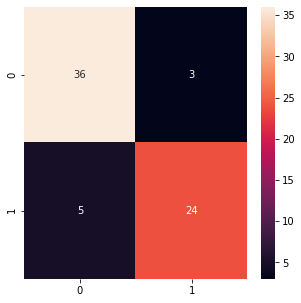

In [346]:
clf = MultinomialNB()
trainModel(clf, str_list, tags, 'tfidf', 0.2)

## DECISION TREE

### BOW

In [347]:
dtc = DecisionTreeClassifier()
cross_validation_wrapper(str_list,tags,'bow',0.0, dtc)

Training Accuracy scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Accuracy
100.0
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Precision
1.0
Training Recall scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Recall
1.0
Training F1 scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training F1 Score
1.0
Validation Accuracy scores
0th Fold :  0.9428571428571428
1th Fold :  0.9428571428571428
2th Fold :  0.8857142857142857
3th Fold :  0.9428571428571428
4th Fol

Accuracy = 0.8970588235294118
Classification Report
             precision    recall  f1-score   support

          0       0.95      0.88      0.92        43
          1       0.82      0.92      0.87        25

avg / total       0.90      0.90      0.90        68



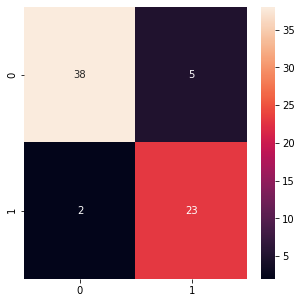

In [349]:
dtc = DecisionTreeClassifier()
trainModel(dtc,str_list, tags, 'bow', 0.2)

### TF-IDF

In [348]:
dtc = DecisionTreeClassifier()
cross_validation_wrapper(str_list,tags,'tfidf',0.0, dtc)


Training Accuracy scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Accuracy
100.0
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Precision
1.0
Training Recall scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Recall
1.0
Training F1 scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training F1 Score
1.0
Validation Accuracy scores
0th Fold :  0.8285714285714286
1th Fold :  0.9428571428571428
2th Fold :  0.6857142857142857
3th Fold :  0.9142857142857143
4th Fol

Accuracy = 0.8676470588235294
Classification Report
             precision    recall  f1-score   support

          0       0.94      0.82      0.87        38
          1       0.80      0.93      0.86        30

avg / total       0.88      0.87      0.87        68



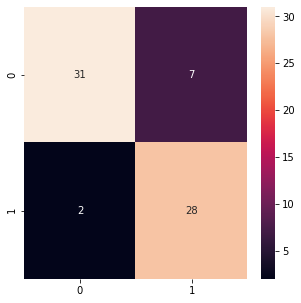

In [350]:
dtc = DecisionTreeClassifier()
trainModel(dtc,str_list, tags, 'tfidf', 0.2)

## RANDOM FOREST 

### BOW

In [352]:
rfc = RandomForestClassifier(15)
cross_validation_wrapper(str_list,tags,'bow',0.0, rfc)


Training Accuracy scores
0th Fold :  1.0
1th Fold :  0.9967213114754099
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  0.9967320261437909
5th Fold :  0.9934640522875817
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.993485342019544
Mean Training Accuracy
99.80402731926326
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  0.9929078014184397
5th Fold :  0.9928571428571429
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.9929078014184397
Mean Training Precision
0.9978672745694024
Training Recall scores
0th Fold :  1.0
1th Fold :  0.9928571428571429
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  0.9928571428571429
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.9929078014184397
Mean Training Recall
0.9978622087132726
Training F1 scores
0th Fold :  1.0
1th Fold :  0.996415770609319
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  0.9964412811387899
5th Fold :  0.9928571428571429
6th Fold :  1.

Accuracy = 0.8382352941176471
Classification Report
             precision    recall  f1-score   support

          0       0.83      0.85      0.84        34
          1       0.85      0.82      0.84        34

avg / total       0.84      0.84      0.84        68



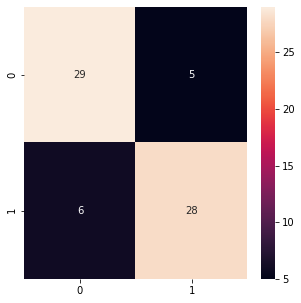

In [353]:
rfc = RandomForestClassifier(15)
trainModel(rfc,str_list, tags, 'bow', 0.2)

### TF-IDF

In [354]:
rfc = RandomForestClassifier(15)
cross_validation_wrapper(str_list,tags,'tfidf',0.0, rfc)


Training Accuracy scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  0.9967213114754099
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.996742671009772
Mean Training Accuracy
99.93463982485181
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Precision
1.0
Training Recall scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  0.9928571428571429
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.9929078014184397
Mean Training Recall
0.9985764944275584
Training F1 scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  0.996415770609319
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  0.9964412811387899
Mean Training F1 Score
0.9992857051748109
Validation Accuracy scores
0

Accuracy = 0.8088235294117647
Classification Report
             precision    recall  f1-score   support

          0       0.82      0.85      0.84        39
          1       0.79      0.76      0.77        29

avg / total       0.81      0.81      0.81        68



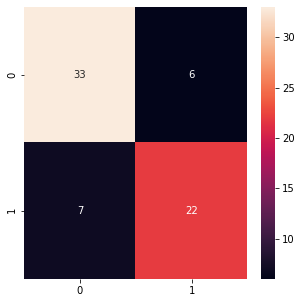

In [355]:
rfc = RandomForestClassifier(15)
trainModel(rfc,str_list, tags, 'tfidf', 0.2)

## SVM

### BOW

In [358]:
svc = SVC(kernel = 'linear')
cross_validation_wrapper(str_list,tags,'bow',0.0, svc)


Training Accuracy scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Accuracy
100.0
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Precision
1.0
Training Recall scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Recall
1.0
Training F1 scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training F1 Score
1.0
Validation Accuracy scores
0th Fold :  0.8857142857142857
1th Fold :  0.9142857142857143
2th Fold :  0.8857142857142857
3th Fold :  0.8285714285714286
4th Fol

Accuracy = 0.8823529411764706
Classification Report
             precision    recall  f1-score   support

          0       0.86      0.95      0.90        40
          1       0.92      0.79      0.85        28

avg / total       0.89      0.88      0.88        68



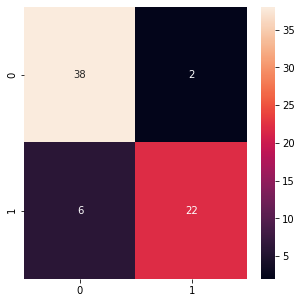

In [359]:
svc = SVC(kernel = 'linear')
trainModel(svc,str_list, tags, 'bow', 0.2)

### TF-IDF

In [356]:
svc = SVC(kernel = 'linear')
cross_validation_wrapper(str_list,tags,'tfidf',0.0, svc)


Training Accuracy scores
0th Fold :  0.9967213114754099
1th Fold :  0.9934426229508196
2th Fold :  0.9967213114754099
3th Fold :  0.9967213114754099
4th Fold :  0.9967320261437909
5th Fold :  0.9967320261437909
6th Fold :  0.996742671009772
7th Fold :  1.0
8th Fold :  0.996742671009772
9th Fold :  0.996742671009772
Mean Training Accuracy
99.67298622693946
Training Precision scores
0th Fold :  1.0
1th Fold :  1.0
2th Fold :  1.0
3th Fold :  1.0
4th Fold :  1.0
5th Fold :  1.0
6th Fold :  1.0
7th Fold :  1.0
8th Fold :  1.0
9th Fold :  1.0
Mean Training Precision
1.0
Training Recall scores
0th Fold :  0.9928571428571429
1th Fold :  0.9857142857142858
2th Fold :  0.9928571428571429
3th Fold :  0.9928571428571429
4th Fold :  0.9928571428571429
5th Fold :  0.9928571428571429
6th Fold :  0.9929078014184397
7th Fold :  1.0
8th Fold :  0.9929078014184397
9th Fold :  0.9929078014184397
Mean Training Recall
0.9928723404255319
Training F1 scores
0th Fold :  0.996415770609319
1th Fold :  0.9928057

Accuracy = 0.8823529411764706
Classification Report
             precision    recall  f1-score   support

          0       0.89      0.93      0.91        42
          1       0.88      0.81      0.84        26

avg / total       0.88      0.88      0.88        68



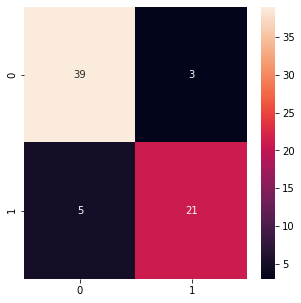

In [357]:
svc = SVC(kernel = 'linear')
trainModel(svc,str_list, tags, 'tfidf', 0.2)